In [1]:
pip install cesium


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.6/324.6 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 554.5/554.5 kB 29.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 4.6 MB/s eta 0:00:00
  Created wheel for gatspy: filename=gatspy-0.3-py3-none-any.whl size=43803 sha256=8b79abc4905e064b635f148a7fa58d2be942984893ffcbccc4605fb17fa7c864
  Stored in directory: /Users/sunflower/Library/Caches/pip/wheels/19/bb/75/b45c8581c921cc0e94560caf49b75a8eba8c272755f19877c7
Successfully built gatspy
Note: you may need to restart the kernel to use updated packages.


In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

from cesium import datasets

import pandas as pd
data = pd.read_csv('../data/merged_pod_data_v2.csv', header=0)
data = data.loc[:,data.columns != 'pod']
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3434 entries, 0 to 3433
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         3434 non-null   int64  
 1   time       3434 non-null   int64  
 2   fd         3434 non-null   float64
 3   fs_usage   3434 non-null   float64
 4   socket     3434 non-null   float64
 5   thread     3434 non-null   float64
 6   cpu        3434 non-null   float64
 7   memory     3434 non-null   float64
 8   rss        3434 non-null   float64
 9   rx_bytes   3434 non-null   float64
 10  rx_errors  3434 non-null   float64
 11  tx_bytes   3434 non-null   float64
 12  tx_errors  3434 non-null   float64
dtypes: float64(11), int64(2)
memory usage: 348.9 KB


In [50]:
time = data['time'].to_numpy()
memory = data['memory'].to_numpy()

In [54]:
from cesium import featurize
features_to_use = ["amplitude",
                   "percent_beyond_1_std",
                   "maximum",
                   "max_slope",
                   "median",
                   "median_absolute_deviation",
                   "percent_close_to_median",
                   "minimum",
                   "skew",
                   "std",
                   "weighted_average"]
fset_cesium = featurize.featurize_time_series(times=time,
                                              values=memory,
                                              errors=None,
                                              features_to_use=features_to_use)
print(fset_cesium.head())

feature     amplitude percent_beyond_1_std       maximum max_slope  \
channel             0                    0             0         0   
0        2.327660e+08             0.259755  1.541701e+09       NaN   

feature        median median_absolute_deviation percent_close_to_median  \
channel             0                         0                       0   
0        1.186107e+09              3.481704e+07                0.613861   

feature       minimum      skew           std weighted_average  
channel             0         0             0                0  
0        1.076169e+09  1.183946  6.368164e+07     1.189685e+09  


/opt/homebrew/anaconda3/lib/python3.10/site-packages/cesium/features/common_functions.py:7: RuntimeWarning: divide by zero encountered in divide
  slopes = np.diff(x) / np.diff(t)
/opt/homebrew/anaconda3/lib/python3.10/site-packages/cesium/features/common_functions.py:7: RuntimeWarning: invalid value encountered in divide
  slopes = np.diff(x) / np.diff(t)


In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

train, test = train_test_split(np.arange(len(eeg["classes"])), random_state=0)

model_cesium = RandomForestClassifier(n_estimators=128, max_features="auto",
                                      random_state=0)
model_cesium.fit(fset_cesium.iloc[train], eeg["classes"][train])

model_guo = KNeighborsClassifier(3)
model_guo.fit(fset_guo.iloc[train], eeg["classes"][train])

model_dwt = KNeighborsClassifier(3)
model_dwt.fit(fset_dwt.iloc[train], eeg["classes"][train])

array([0.00000000e+00, 1.67967360e+18, 6.12110000e+02, 1.96343439e+08,
       3.49170000e+02, 3.83590000e+02, 1.62296164e+07, 1.10157666e+09,
       5.59923524e+08, 1.71623048e+10, 0.00000000e+00, 2.20415124e+10,
       0.00000000e+00])

Loaded data from cached archive.


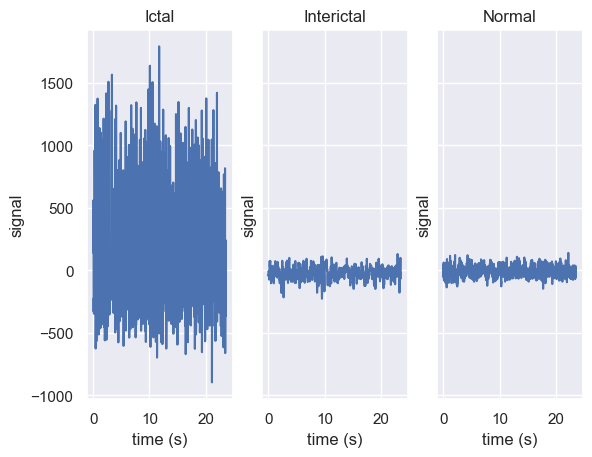

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

from cesium import datasets

eeg = datasets.fetch_andrzejak()

# Group together classes (Z, O), (N, F), (S) as normal, interictal, ictal
eeg["classes"] = eeg["classes"].astype("U16") #  allocate memory for longer class names
eeg["classes"][np.logical_or(eeg["classes"]=="Z", eeg["classes"]=="O")] = "Normal"
eeg["classes"][np.logical_or(eeg["classes"]=="N", eeg["classes"]=="F")] = "Interictal"
eeg["classes"][eeg["classes"]=="S"] = "Ictal"

fig, ax = plt.subplots(1, len(np.unique(eeg["classes"])), sharey=True)
for label, subplot in zip(np.unique(eeg["classes"]), ax):
    i = np.where(eeg["classes"] == label)[0][0]
    subplot.plot(eeg["times"][i], eeg["measurements"][i])
    subplot.set(xlabel="time (s)", ylabel="signal", title=label)

In [47]:
eeg['classes']

array(['Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Norm